# Advanced Clustering with DBSCAN
** – Unsupervised Learning**

**Objective:**  
- Apply DBSCAN to identify clusters and noise in synthetic and real-world-like customer data  
- Compare DBSCAN with K-Means and visualize results  
- Demonstrate parameter tuning (eps & min_samples) and insights  


In [220]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


In [221]:
# Synthetic dataset for clustering demonstration
X, _ = make_moons(n_samples=500, noise=0.08)  # Two interleaving half circles
print("Dataset shape:", X.shape)



Dataset shape: (500, 2)


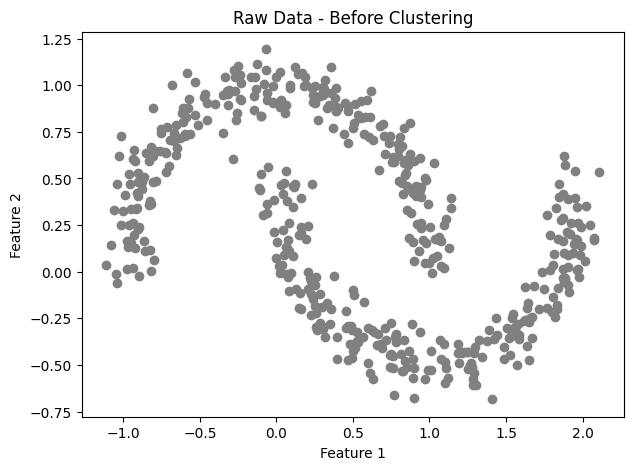

In [222]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c='gray')
plt.title("Raw Data - Before Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [223]:
# Scaling is mandatory for DBSCAN distance calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


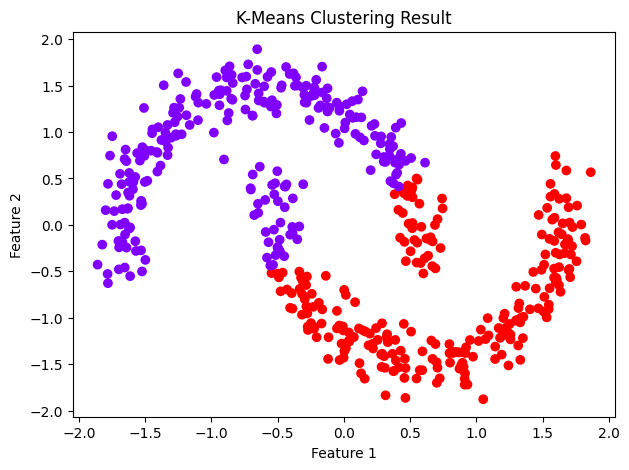

In [224]:
# Apply K-Means (for comparison)
kmeans = KMeans(n_clusters=2, random_state=42,n_init='auto' )
labels_km = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_km, cmap='rainbow')
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### K-Means Result:
- Clusters forced to be roughly circular
- Fails to capture the true shape of interleaving moons
- No noise detection


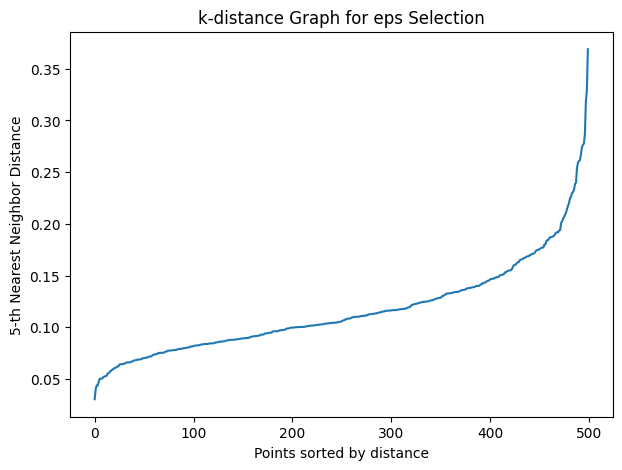

In [225]:
# Choose min_samples = 5
min_samples = 5
nbrs = NearestNeighbors(n_neighbors=min_samples)
nbrs.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

# k-distance plot
distances = np.sort(distances[:, min_samples-1])
plt.figure(figsize=(7,5))
plt.plot(distances)
plt.title("k-distance Graph for eps Selection")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-th Nearest Neighbor Distance")
plt.show()


### eps Selection:
- Sharp bend ("elbow") in the k-distance graph indicates optimal eps
- Helps DBSCAN distinguish dense clusters from noise


In [226]:
# Apply DBSCAN with chosen parameters
eps = 0.2  # Replace with elbow value from plot
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_db = dbscan.fit_predict(X_scaled)

# Number of clusters and noise points
unique, counts = np.unique(labels_db, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("DBSCAN cluster counts (including noise=-1):", cluster_counts)


DBSCAN cluster counts (including noise=-1): {np.int64(-1): np.int64(5), np.int64(0): np.int64(247), np.int64(1): np.int64(248)}


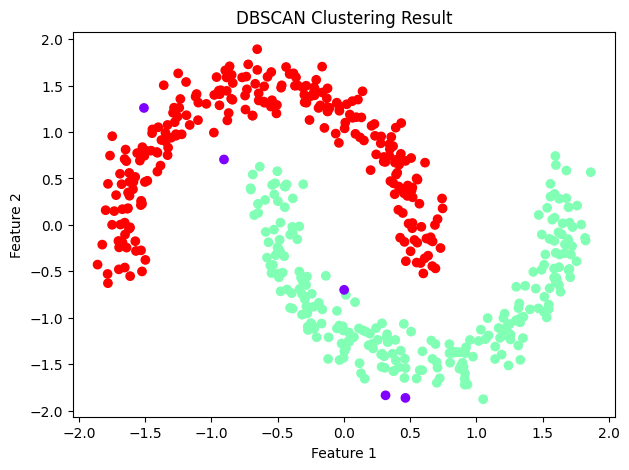

In [227]:
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_db, cmap='rainbow')
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig("dbscan_clusters.png", dpi=300)
plt.show()


### DBSCAN Result:
- Captures true cluster shapes (arbitrary, non-circular)
- Detects noise points (label = -1)
- More realistic clustering than K-Means


In [228]:
# Silhouette Score ignoring noise points
mask = labels_db != -1
score = silhouette_score(X_scaled[mask], labels_db[mask])
print("Silhouette Score (DBSCAN, ignoring noise):", round(score,3))


Silhouette Score (DBSCAN, ignoring noise): 0.381


### Evaluation:
- Silhouette Score indicates cluster cohesion and separation
- Visual inspection confirms correct clusters
- Noise points are meaningful outliers


In [229]:
import pandas as pd
import zipfile
import os

zip_file_path = '/content/archive (2).zip'
extraction_path = '/content/unzipped_archive'

os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

csv_file_path = os.path.join(extraction_path, 'Mall_Customers.csv')

df = pd.read_csv(csv_file_path)
df.head()
X_cust = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

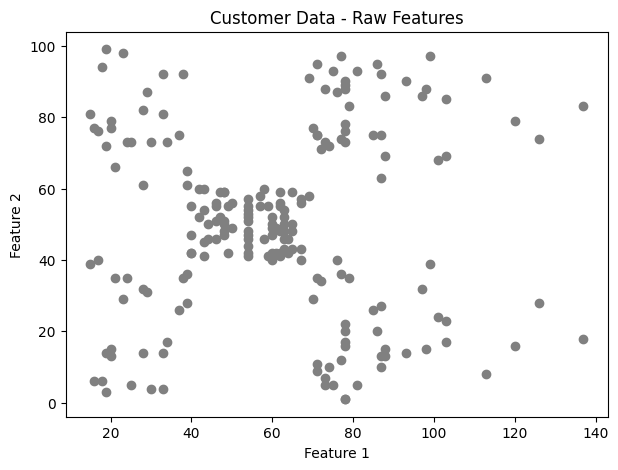

In [230]:
plt.figure(figsize=(7,5))
plt.scatter(X_cust[:,0], X_cust[:,1], c='gray')
plt.title("Customer Data - Raw Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [231]:
scaler_cust = StandardScaler()
X_cust_scaled = scaler_cust.fit_transform(X_cust)


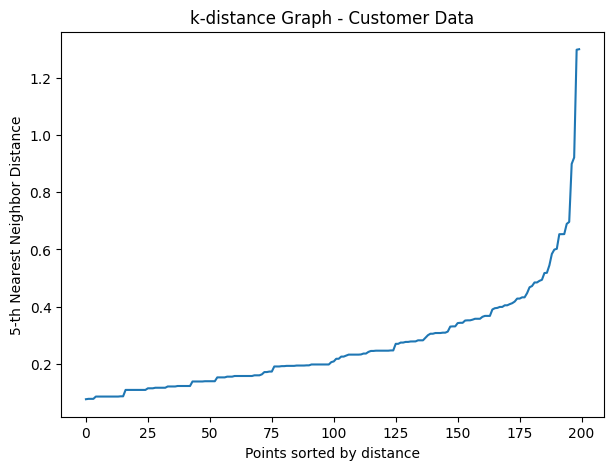

In [232]:
# k-distance plot for eps selection
min_samples_cust = 5
nbrs_cust = NearestNeighbors(n_neighbors=min_samples_cust)
nbrs_cust.fit(X_cust_scaled)
distances_cust, _ = nbrs_cust.kneighbors(X_cust_scaled)

distances_cust = np.sort(distances_cust[:, min_samples_cust-1])
plt.figure(figsize=(7,5))
plt.plot(distances_cust)
plt.title("k-distance Graph - Customer Data")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples_cust}-th Nearest Neighbor Distance")
plt.show()


**Observation:**  
- Choose eps at the "elbow" for best clustering


In [233]:
eps_cust = 0.5  # Replace with elbow value from k-distance plot
dbscan_cust = DBSCAN(eps=eps_cust, min_samples=min_samples_cust)
labels_db_cust = dbscan_cust.fit_predict(X_cust_scaled)

unique, counts = np.unique(labels_db_cust, return_counts=True)
cluster_counts_cust = dict(zip(unique, counts))
print("DBSCAN cluster counts (customer):", cluster_counts_cust)


DBSCAN cluster counts (customer): {np.int64(-1): np.int64(8), np.int64(0): np.int64(157), np.int64(1): np.int64(35)}


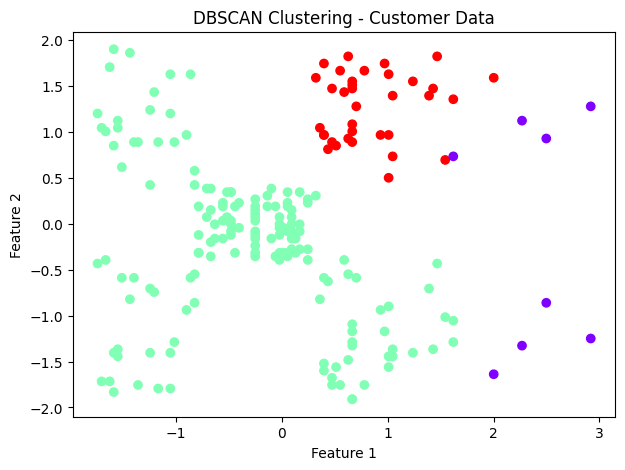

In [234]:
plt.figure(figsize=(7,5))
plt.scatter(X_cust_scaled[:,0], X_cust_scaled[:,1], c=labels_db_cust, cmap='rainbow')
plt.title("DBSCAN Clustering - Customer Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig("dbscan_customer.png", dpi=300)

plt.show()


**Observation:**  
- DBSCAN identifies real customer groups  
- Noise points represent rare customers or anomalies  
- Clusters can inform marketing segmentation


In [235]:
mask_cust = labels_db_cust != -1
score_cust = silhouette_score(X_cust_scaled[mask_cust], labels_db_cust[mask_cust])
print("Silhouette Score (Customer Data, DBSCAN):", round(score_cust,3))


Silhouette Score (Customer Data, DBSCAN): 0.388


## Key Insights:

### Synthetic Data
- DBSCAN captures non-linear clusters
- Noise points are clearly identified
- K-Means fails on non-linear shapes
- Silhouette score indicates good separation

### Customer Data
- DBSCAN identifies natural customer segments
- Noise points may represent anomalies or VIPs
- Visualizations confirm meaningful clustering
- Parameters (eps, min_samples) tuned using k-distance plot

- Feature scaling applied to both datasets
- Visualizations used for validation
- Silhouette score supports evaluation
